In [1]:
from mindee import Client
import json
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
from IPython.lib.pretty import pretty

In [2]:
mindee_client = Client(
    passport_token='<insert api key>',
    raise_on_error=True
)
#get a free api key at platform.mindee.com

Image size: (389, 691)


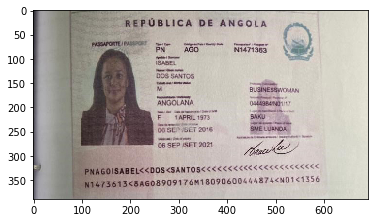

In [3]:
#load image - get height and width - show image
imagepath = 'images/fakepassport.jpg'
image = cv2.imread(imagepath)
#fix colour space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, channels = image.shape
print(f"Image size: ({height}, {width})")
plt.imshow(image)
plt.show()

In [4]:
parsed_data = mindee_client.parse_passport(imagepath)

In [5]:
print(parsed_data.passport)

-----Passport data-----
Filename: fakepassport.jpg 
Full name: DOS VSABEL 
Given names: DOS SANTOS 
Surname: VSABEL
Country: AGO
ID Number: N1473613
Issuance date: 2008-09-07
Birth date: 1989-09-17
Expiry date: 2018-09-06
MRZ 1: PNAGOVSABEL<<DOS<SANTOS<<<<<<<<<<<<<<<<<<<<<
MRZ 2: N1473613<8AGO8909176M18090600444874<N01<1356
MRZ: PNAGOVSABEL<<DOS<SANTOS<<<<<<<<<<<<<<<<<<<<<N1473613<8AGO8909176M18090600444874<N01<1356
----------------------


In [6]:
print(parsed_data.http_response)

{'api_request': {'error': {}, 'resources': ['document'], 'status': 'success', 'status_code': 201, 'url': 'http://api.mindee.net/v1/products/mindee/passport/v1/predict'}, 'document': {'annotations': {'labels': {}}, 'id': '18cf0201-27b6-43c2-9e67-936c13d8c2b3', 'inference': {'extras': {}, 'finished_at': '2022-01-11T23:29:22+00:00', 'pages': [{'id': 0, 'prediction': {'birth_date': {'confidence': 1.0, 'polygon': [[0.15, 0.866], [0.86, 0.866], [0.86, 0.951], [0.15, 0.951]], 'value': '1989-09-17'}, 'birth_place': {'confidence': 0.0, 'polygon': [], 'value': None}, 'country': {'confidence': 1.0, 'polygon': [[0.449, 0.189], [0.498, 0.189], [0.498, 0.233], [0.449, 0.233]], 'value': 'AGO'}, 'expiry_date': {'confidence': 1.0, 'polygon': [[0.15, 0.866], [0.86, 0.866], [0.86, 0.951], [0.15, 0.951]], 'value': '2018-09-06'}, 'gender': {'confidence': 1.0, 'polygon': [[0.15, 0.866], [0.86, 0.866], [0.86, 0.951], [0.15, 0.951]], 'value': 'M'}, 'given_names': [{'confidence': 0.23, 'polygon': [[0.15, 0.802

In [10]:
given_names = parsed_data.passport.given_names
print("all given names: ")
for given_name in given_names:

   # To get the name string
   name = given_name.value
   print(name)

all given names: 
DOS
SANTOS


In [11]:
surname = parsed_data.passport.surname.value
print("surname: ",surname)

surname:  VSABEL


In [15]:
# To get the passport's owner gender (string among {"M", "F"}
# Note that the fake passport in the example provides the incorrect value. The signature is also Bruce Lee's.
gender = parsed_data.passport.gender.value
print("gender: ", gender)

gender:  M


In [16]:
# To get the passport's owner full name (string)
full_name = parsed_data.passport.full_name.value
print("fullname: ",full_name)

fullname:  DOS VSABEL


In [17]:
# To get the passport's owner birth place (string)
birth_place = parsed_data.passport.birth_place.value
print("birthplace: ", birth_place)

birthplace:  None


In [18]:
# To get the passport's owner date of birth (string)
birth_date = parsed_data.passport.birth_date.value

# To get the passport date of issuance (string)
issuance_date = parsed_data.passport.issuance_date.value

# To get the passport expiry date (string)
expiry_date = parsed_data.passport.expiry_date.value

print("DOB: ",birth_date)
print("issued: ", issuance_date)
print("expires: ",expiry_date)

DOB:  1989-09-17
issued:  2008-09-07
expires:  2018-09-06


In [19]:
# To get the passport  first line of machine readable zone (string)
mrz1 = parsed_data.passport.mrz1.value

# To get the passport  seco d line of machine readable zone (string)
mrz2 = parsed_data.passport.mrz2.value

# To get the passport full machine readable zone (string)
mrz = parsed_data.passport.mrz.value
print(mrz1)
print(mrz2)
print(mrz)


PNAGOVSABEL<<DOS<SANTOS<<<<<<<<<<<<<<<<<<<<<
N1473613<8AGO8909176M18090600444874<N01<1356
PNAGOVSABEL<<DOS<SANTOS<<<<<<<<<<<<<<<<<<<<<N1473613<8AGO8909176M18090600444874<N01<1356


In [20]:
# To get the passport id number (string)
id_number = parsed_data.passport.id_number.value

# To get the passport country code (string)
country_code = parsed_data.passport.country.value

print("passport number: ", id_number)
print("passport country code: ", country_code)

passport number:  N1473613
passport country code:  AGO
